# Lab Notebook

    Course: BioE 131
    Lab No: Lab #5
    Submission date: 09/26/2018
    
    Team members: Michael Fernandez, Jinho Ko
    

# Collecting datas from the paper  

Sequence, OBS, Site II information from:
- Penchovsky, Robert, and Ronald R. Breaker. "Computational design and experimental validation of oligonucleotide-sensing allosteric ribozymes." Nature biotechnology 23.11 (2005): 1424.  

In [2]:
# (1) riboswitch name, (2) start and end coordinates of OBS-1 (blue region), (3) start 
# and end coordinates of OBS-2 (blue region, only applicable to AND-1 and OR-1), and (4) start and end coordinates of the two red regions.

info = [('YES-1', (26, 47), (16,21), (49,54) ),              # YES-1 OBS1 RED1 RED2
        ('NOT-1', (44,66), (40,43), (74,77)),                # NO-1 OBS1 RED1 RED2
        ('AND-1', (30,45), (49,64), (16,23), (70,77)),       # AND-1 OBS1 OBS2 RED1 RED2
        ('OR-1', (27,46), (47,66), (16,26), (67,77) ) ]      # OR-1 OBS1 OBS2 RED1 RED2

seqs = [
    
    'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC',                                   # YES-1
    'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC',                       # NO-1
    'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU',   # AND-1
    'GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'             # OR-1
]


In [7]:
# RNAfold, RNaplot from the sequence
import subprocess

In [5]:
def RNAplot(seq):
    
    for iterator, i in enumerate(seq):
    
        # Do Rnaplot
        p = subprocess.run(['RNAfold'],
                 input = bytes(i,'ascii'),
                 stdout = subprocess.PIPE,
                 stderr = subprocess.PIPE)
        #print(p.stdout.decode())
        st = str(p.stdout.decode())
    
        # Proceding datas from the result of RNAfold
        sequence = []
        new = []
    
        a = False
        for letter in list(st):
            if letter in ('G','U','C','A'):
                sequence.append(letter)
                continue
            if letter in ('(',')','.'):
                a = True
            if letter is ' ':
                break
            if a:
                new.append(letter)
    
        sequence = "".join(sequence)
        new = "".join(new)
    
        print("".join(sequence))
        print("".join(new))
    
        # Do RNAplot with the procecded data
        

        pp = subprocess.run(['RNAplot','--output-format=svg'], input = bytes(sequence+'\n'+new+'\n@', 'ascii'), stdout = subprocess.PIPE, stderr = subprocess.PIPE)
        print(pp.stderr.decode())
            
        # Change filename properly
        ppp = subprocess.run(['mv', './rna.svg', './rna'+str(iterator)+'.svg' ], stdout = subprocess.PIPE, stderr = subprocess.PIPE)
        


In [22]:
RNAplot(seqs)

GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).))))))))

GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....))))

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).)))))))).........

GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).))))))))



# Comparison BEFORE setting parameters

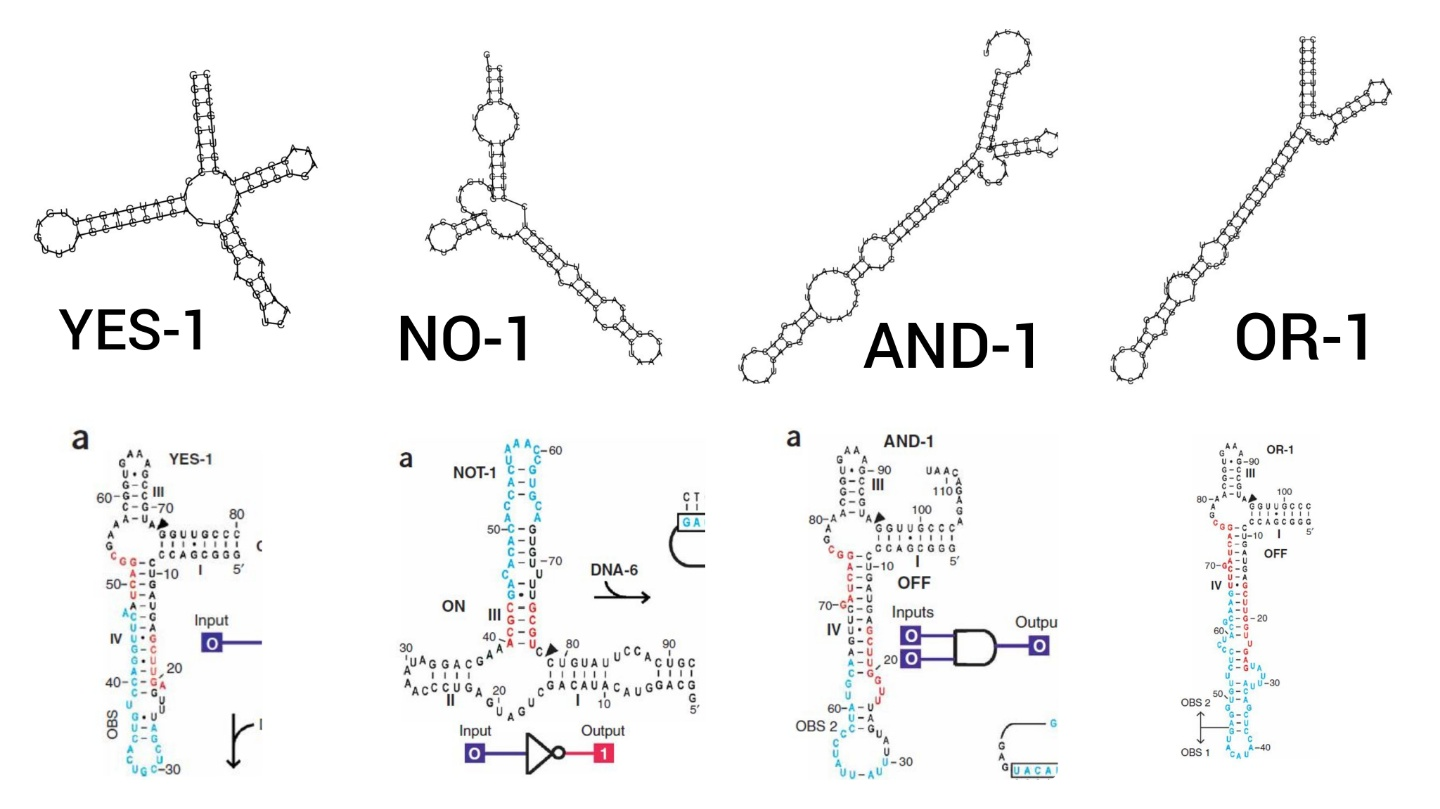

First We converted the result 'rnaX.svg' file into jpg format in our own Windows computer. Then we collaged the images from the result/ from the paper and indexed to compare the shape.


The results wasn't perfectly identical with the images from the original paper.  


Source of the lower part of the Image:
- Penchovsky, Robert, and Ronald R. Breaker. "Computational design and experimental validation of oligonucleotide-sensing allosteric ribozymes." Nature biotechnology 23.11 (2005): 1424.  


# Description of differences

For YES-1, our result makes 4 stems in False input, while the gate in the paper makes 3. The second long stem(from 9 to 52) in paper is divided into 2 individual stems, each forming complementary pair, and their stem.  
For NOT-1, the result were same with the one from the paper.  
For AND-1, the result were same with the one from the paper. (there's a little cut in the paper's picture(from 30-50) but same anyway.)  
For OR-1 , the result were same with the one from the paper.

The research team controlled the temperture using softwares such as RNAheat, and thought about the stability of the folded RNA while temperature changes from 20'C to 40'C. They found 'dominant structure' for each bio-logic gate. However, what we inserted was just sequences itself, without other additional process. So the program(RNAplot) might print out the results that are less likely to exist in real conditions.

In [65]:
# adding constraints 

outfile =[]
outfilename = []
for i, name in enumerate(info[:2]):  # for YES/NOT
    outfilename.append(name[0]+'_constraints.txt')
    outfile.append(open(name[0]+'_constraints.txt', 'w'))
    
    p = subprocess.run(['RNAfold'],
                 input = bytes(seqs[i],'ascii'),
                 stdout = subprocess.PIPE,
                 stderr = subprocess.PIPE)
    #print(p.stdout.decode())
    st = str(p.stdout.decode())
    
    # Proceding datas from the result of RNAfold
    sequence = []
    new = []
    
    a = False
    for letter in list(st):
        if letter in ('G','U','C','A'):
            sequence.append(letter)
            continue
        if letter in ('(',')','.'):
            a = True
        if letter is ' ':
            break
        if a:
            new.append(letter)
    
    sequence = "".join(sequence)                  # Add Sequence to the file    
    outfile[i].write(sequence+'\n')               
    
    o1_s , o1_e = name[1]
    
    for j in range(o1_s-1):
        outfile[i].write('.')
    for j in range(o1_e-o1_s+1):
        outfile[i].write('x')
    for j in range( len(seq[i])-o1_e):
        outfile[i].write('.')                      # Write constraints to the file

    outfile[i].close()
    


In [15]:
outfile =[]
outfilename2 = []

for i, name in enumerate(info[2:4]):  # for AND/OR

    tt= [(True,True),(True,False),(False,True)]
    
    for f, n in enumerate(tt):
        
        outfilename2.append(name[0]+str(n[0])[:1]+str(n[1])[:1]+'_constraints.txt')
        outfile.append(open(name[0]+str(n[0])[:1]+str(n[1])[:1]+'_constraints.txt', 'w'))
    
        p = subprocess.run(['RNAfold'],
                 input = bytes(seqs[i+2],'ascii'),
                 stdout = subprocess.PIPE,
                 stderr = subprocess.PIPE)
        #print(p.stdout.decode())
        st = str(p.stdout.decode())
    
        # Proceding datas from the result of RNAfold
        sequence = []
        new = []
    
        a = False
        for letter in list(st):
            if letter in ('G','U','C','A'):
                sequence.append(letter)
                continue
            if letter in ('(',')','.'):
                a = True
            if letter is ' ':
                break
            if a:
                new.append(letter)
    
        sequence = "".join(sequence)                  
        outfile[i*3+f].write(sequence+'\n') 
    
        st1 , end1 = name[1]
        st2, end2 = name[2]
    
        
        
        for j in range(st1-1):
            outfile[i*3+f].write('.')
            
        for j in range(end1-st1+1):
            if n[0]:
                outfile[i*3+f].write('x')
            else:
                outfile[i*3+f].write('.')
                
        for j in range(st2-end1-1):
            outfile[i*3+f].write('.')
        
        for j in range(end2-st2+1):
            if n[1]:
                outfile[i*3+f].write('x')
            else:
                outfile[i*3+f].write('.')

        for j in range( len(seqs[i+2])-end2 ):
            outfile[i*3+f].write('.')
                
                
        outfile[i*3+f].close()
        
        print("run")

            

run
run
run
run
run
run


# Creating RNAplot with OBS constrained

In [17]:
def RNAplot_C(filename, seq):
    
    # Make ps file with constraints
    
    tmp = open(filename,'r')
    tmp = ""+tmp.read()

    pp = subprocess.run(['RNAfold','-C'], input = (tmp+'\n@').encode('ascii'), stdout = subprocess.PIPE, stderr = subprocess.PIPE)
    print(pp.stderr.decode())
    print(pp.stdout.decode())
            
    # Change filename properly
    ppp = subprocess.run(['mv', './rna.ps', './rnaC_'+filename[:-16]+'.ps' ], stdout = subprocess.PIPE, stderr = subprocess.PIPE)

In [20]:
RNAplot_C(outfilename[0], seqs[0])
RNAplot_C(outfilename[1], seqs[1])
RNAplot_C(outfilename2[0], seqs[2])
RNAplot_C(outfilename2[1], seqs[2])
RNAplot_C(outfilename2[2], seqs[2])
RNAplot_C(outfilename2[3], seqs[3])
RNAplot_C(outfilename2[4], seqs[3])
RNAplot_C(outfilename2[5], seqs[3])



GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((..............................................))))).))))).....(((((....))))).))))))))......... (-27.64)


GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).))))))))......... (-33.90)


GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((..............................................))))).))))).....(((((....))))).))))))))......... (-27.64)


GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).))))))))......... (-33.90)


GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUG

# Comparison AFTER setting parameters - YES-1 , NOT-1

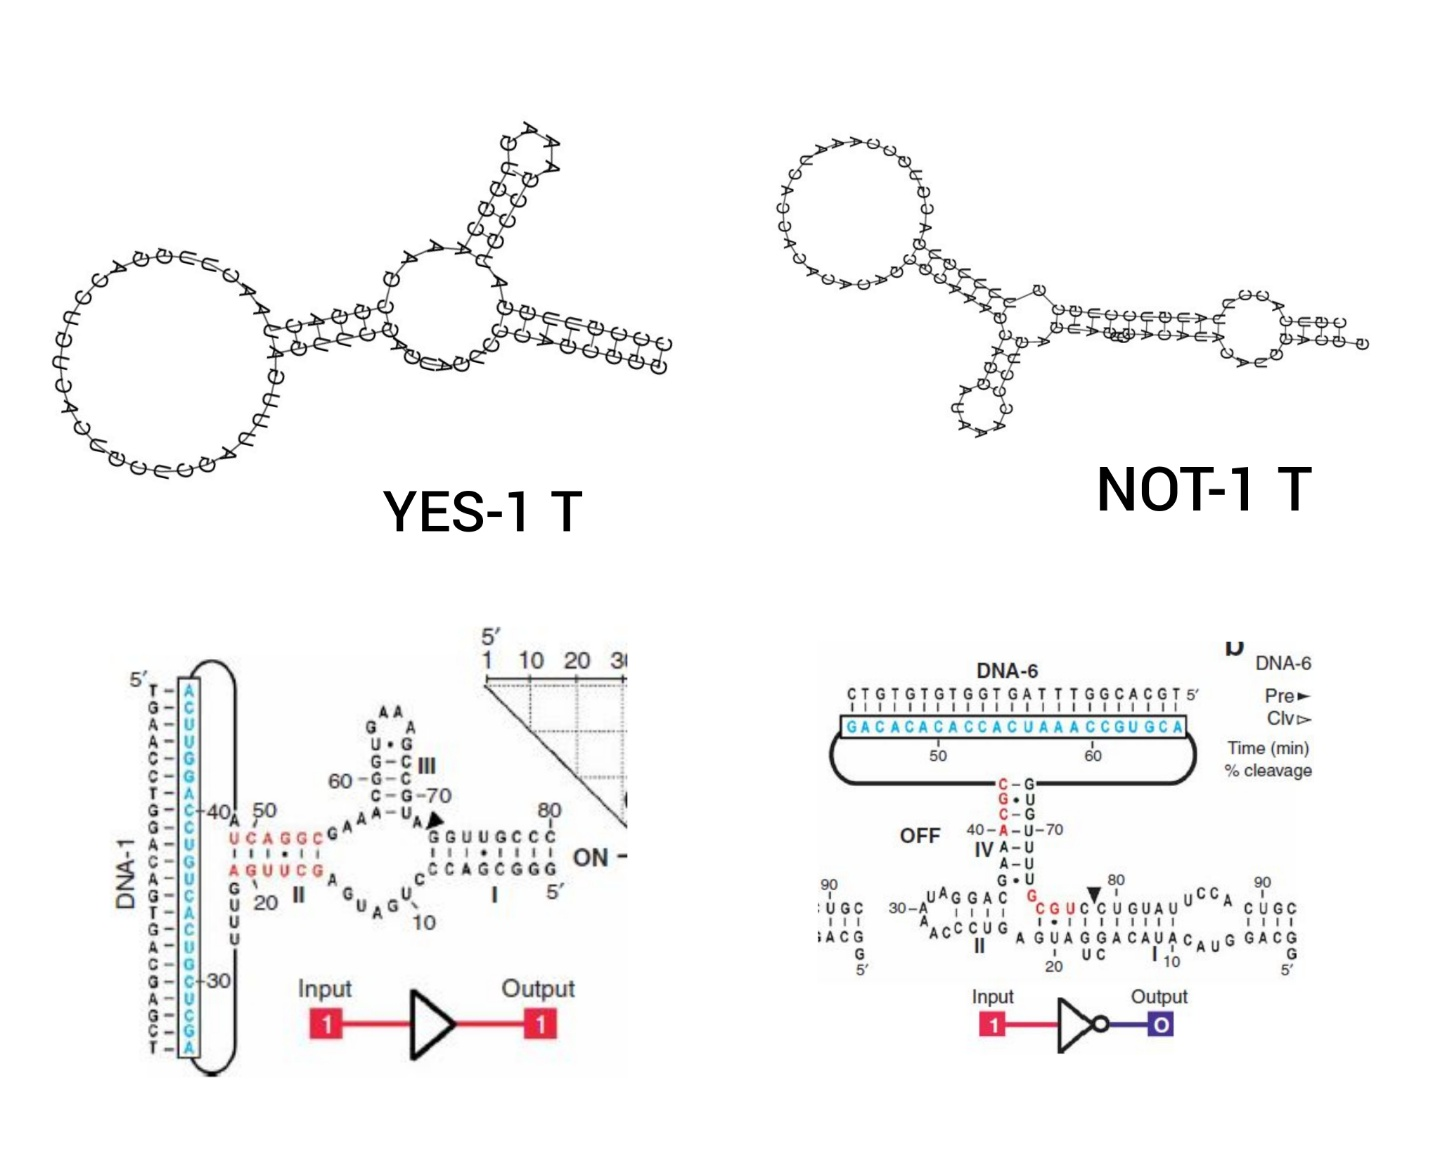

For YES-1, NO-1 gate, we can easily verify that the result corresponds to the form in the paper.

- Penchovsky, Robert, and Ronald R. Breaker. "Computational design and experimental validation of oligonucleotide-sensing allosteric ribozymes." Nature biotechnology 23.11 (2005): 1424.  

# Comparison AFTER setting parameters - AND-1


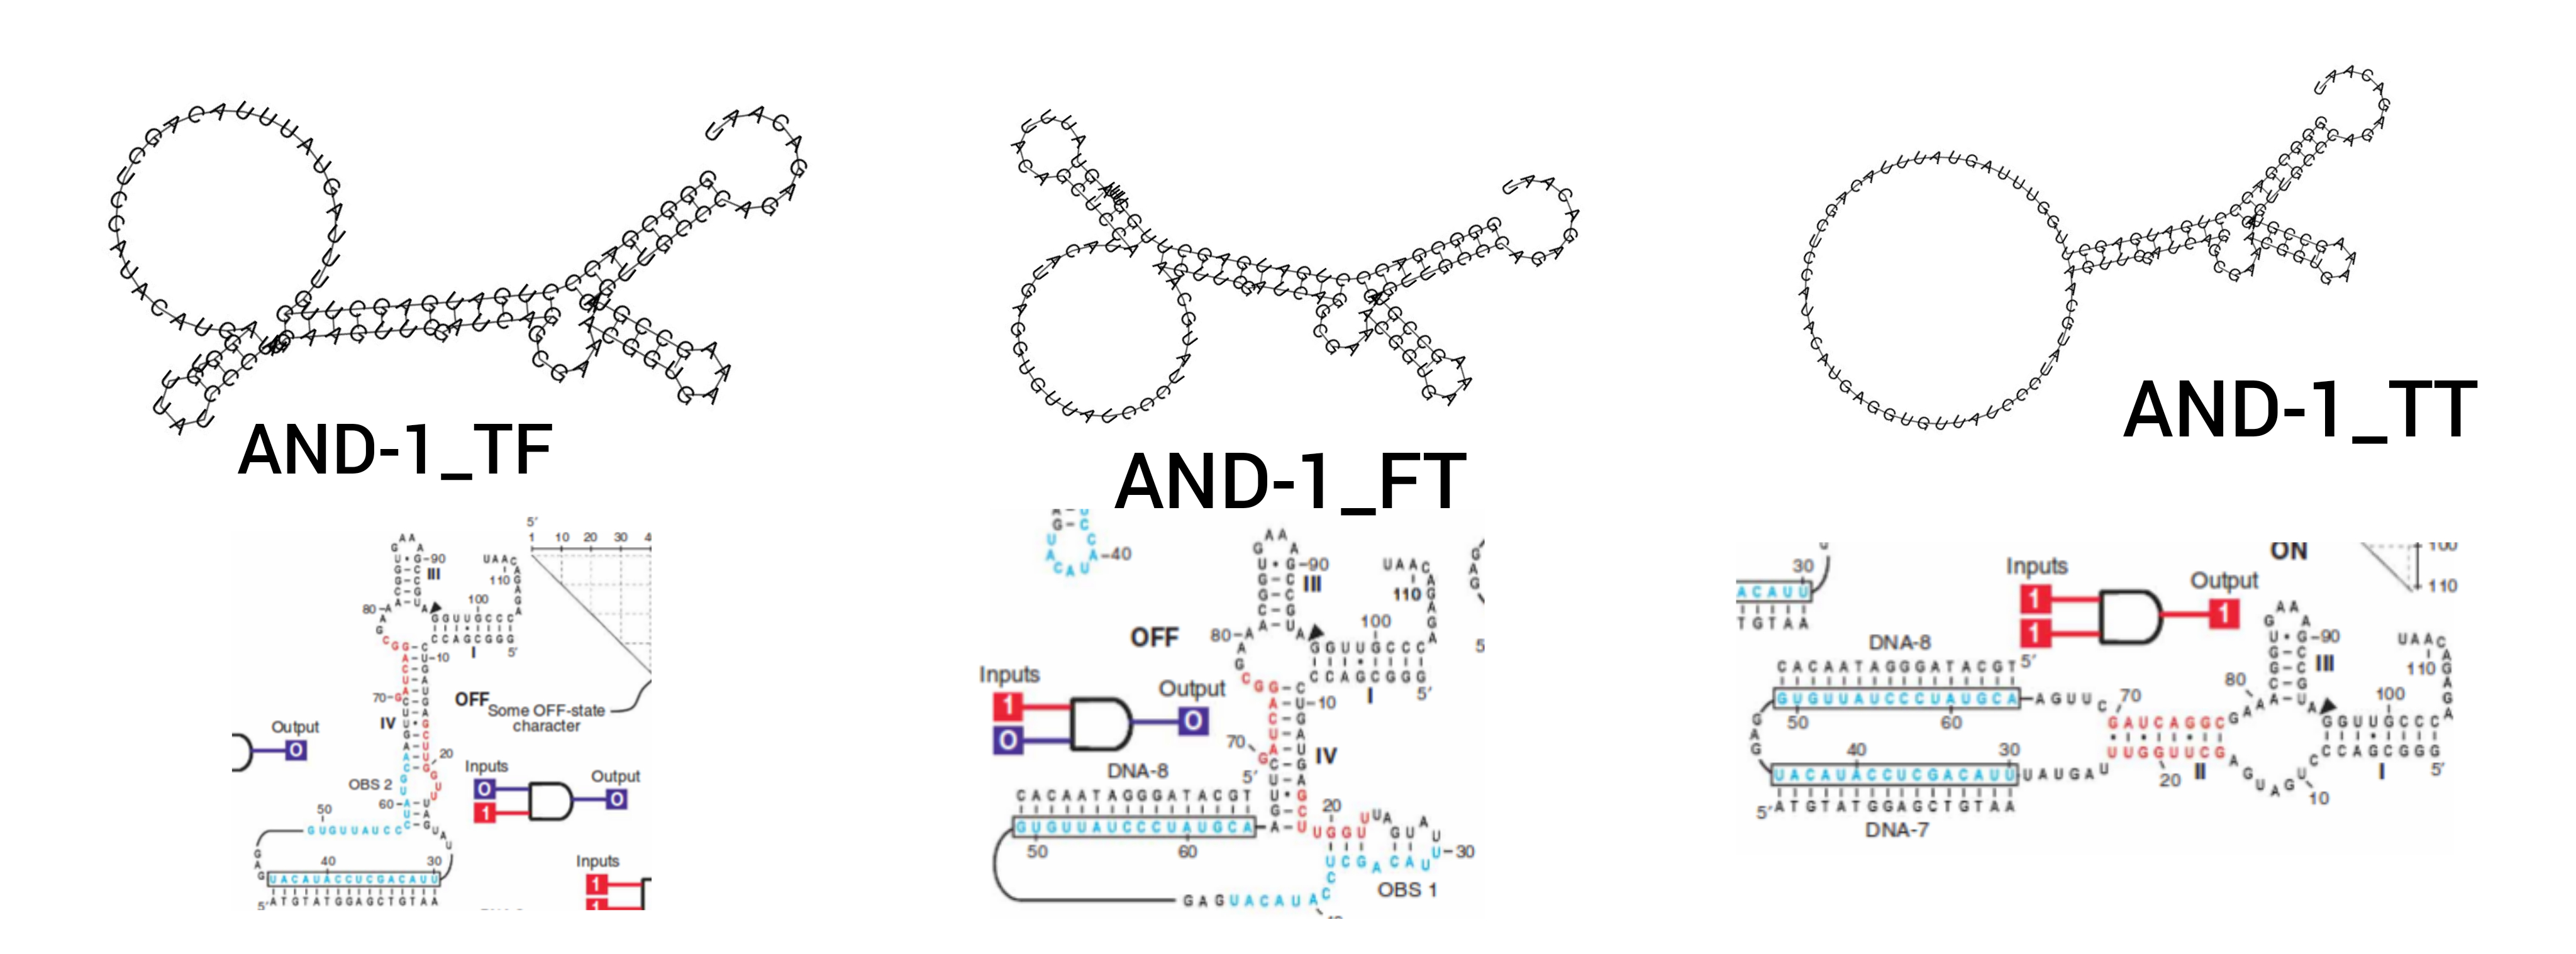

For AND gate, the result did not show up properly. For TF and FT for AND gate, the result was same with the data shown from the paper, and since a part of stem II region combined wih one of OBS site, stem II was not formed(which results to False) in our result.  
However, for TT input, the stem II should be made, but it didn't. Though the pairing between OBS site and stem II region didn't happen(due to OBS-DNA pairing), the pairing didn't change for the stem II region still. Therefore, the stem remained still as a form of stem IV.

- Penchovsky, Robert, and Ronald R. Breaker. "Computational design and experimental validation of oligonucleotide-sensing allosteric ribozymes." Nature biotechnology 23.11 (2005): 1424.  

# Comparison AFTER setting parameters - OR-1


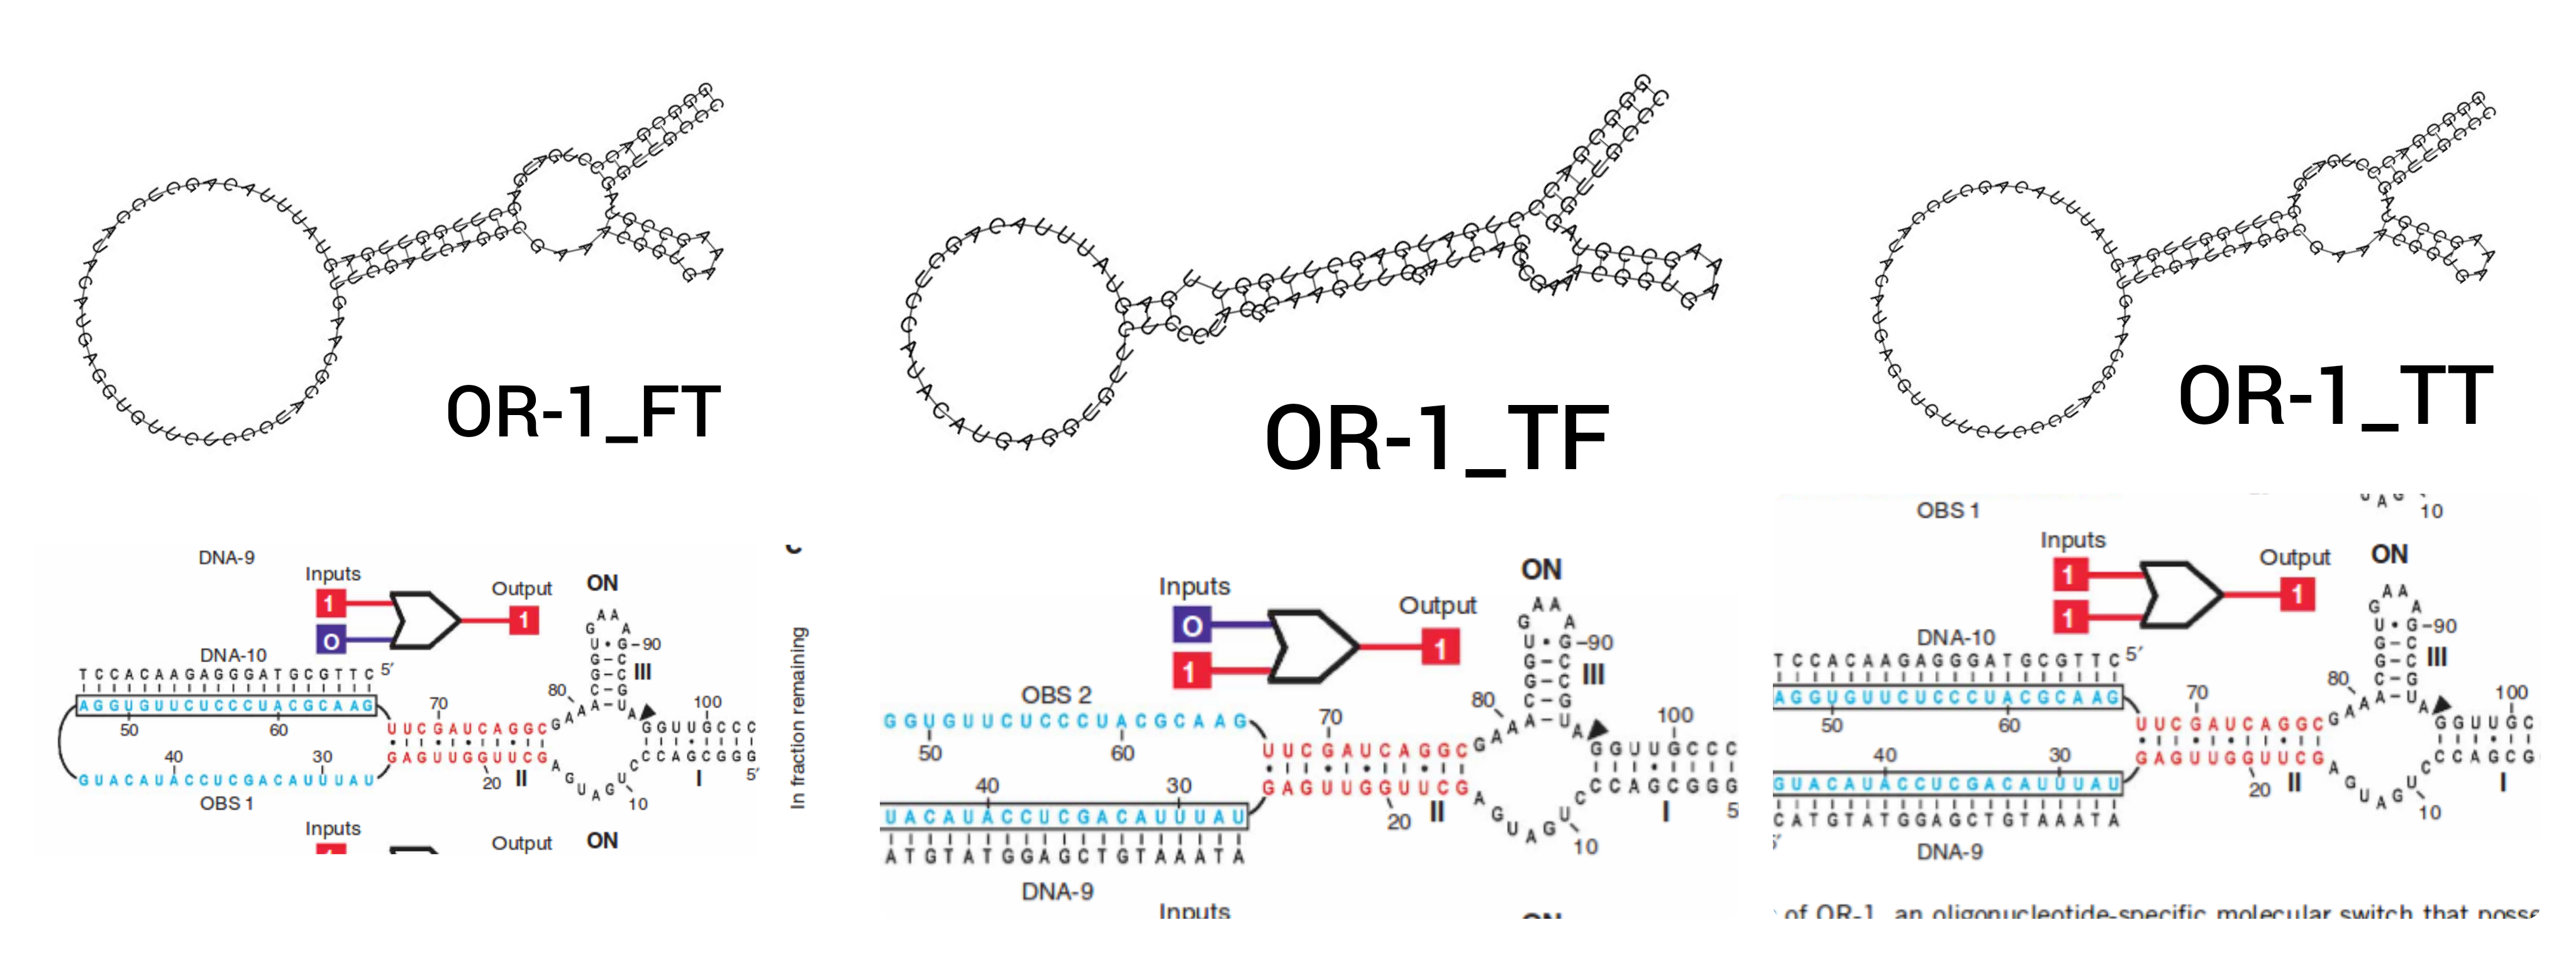


For the first case, where OR-1 is OBS-2 bound, true, and OBS-1 unbound, false, the structure matches the one in the paper.

In the case where OBS-1 is bound, true and OBS-2 is unbound, false, the stuctures are much different. In this case the OBS-2 sequence is bound partially to right before the OBS-1. In this case 'CUCCCUACGCAAG' is the section of OBS-2 that is now bound as oppose to the original where this is not the case

And lastly for the OR-1 where both OBS-1 and OBS-2 are bound and their states are true the structure we created is identical to the structure in the paper.

- Penchovsky, Robert, and Ronald R. Breaker. "Computational design and experimental validation of oligonucleotide-sensing allosteric ribozymes." Nature biotechnology 23.11 (2005): 1424.  